In [1]:
#Loading all the dependencies
import numpy as np
import pandas as pd
import re
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Details:
- We will be using a total of 3 datasets which are available in public specially for the "Grammatical Error Detection Problem" which are:
1) Lang 8 Dataset
2) JFLEG
3) WI-LOC Dataset.

*I will be first processing the data into a Dataframe format and then perform EDA on this Notebook. Model building and hyperparaneter tuning will be done in the next notebooks.*

**We will be using Lang-8 dataset, so here I have first extracted the Dataset**

In [2]:
#! unzip lang-8-en-1.0.zip

**WI-LOC Dataset is another good dataset of the GEC problem, so we will also be using them for training our model.**

In [3]:
#import tarfile
#my_tar = tarfile.open('wi+locness_v2.1.bea19.tar.gz')
#my_tar.extractall('') # specify which folder to extract to
#my_tar.close()

#### Converting the M2 file to Sentences in a Dataset, so that we can work on the data.

In [2]:
#ref https://www.cl.cam.ac.uk/research/nl/bea2019st/data/corr_from_m2.py
def m2_to_df(m2_file_path,id=0):
    '''This function takes m2 file path as input and converts it to pandas dataframe'''

    m2 = open(m2_file_path).read().strip().split("\n\n")
    # Do not apply edits with these error types
    skip = {"noop", "UNK", "Um"}

    correct_sent_array = []
    incorrect_sent_array = []

    for sent in tqdm(m2):
        sent = sent.split("\n")
        incor_sent = sent[0].split()[1:] # Ignore "S "
        incorrect_sent_array.append(str(' '.join(incor_sent))) 
        cor_sent = incor_sent.copy()

        edits = sent[1:]
        offset = 0
        for edit in edits:
            edit = edit.split("|||")
            if edit[1] in skip: continue # Ignore certain edits
            coder = int(edit[-1])
            if coder != id: continue # Ignore other coders
            span = edit[0].split()[1:] # Ignore "A "
            start = int(span[0])
            end = int(span[1])
            cor = edit[2].split()
            cor_sent[start+offset:end+offset] = cor
            offset = offset-(end-start)+len(cor)
        correct_sent_array.append(str(' '.join(cor_sent)))

    df = pd.DataFrame()
    df["correct"] = correct_sent_array
    df["incorrect"] = incorrect_sent_array
    return df

In [3]:
direct='wi+locness/m2/'
data_1=m2_to_df(direct+'ABC.train.gold.bea19.m2')

100%|████████████████████████████████████████████████████████████████| 34308/34308 [00:00<00:00, 158655.88it/s]


In [4]:
data_1.head()

,correct,incorrect
0,My town is a medium - sized city with eighty t...,My town is a medium size city with eighty thou...
1,It has a high - density population because of ...,It has a high density population because its s...
2,"Although it is an industrial city , there are ...","Despite of it is an industrial city , there ar..."
3,I recommend visiting the artificial lake in th...,I recommend visiting the artificial lake in th...
4,Pasteries are very common and most of them off...,Pasteries are very common and most of them off...


#### Adding JFLEG Dataset

In [5]:
#https://github.com/google-research-datasets/C4_200M-synthetic-dataset-for-grammatical-error-correction
#https://github.com/keisks/jfleg
direct=''
incorrect_sent=[]
f=open(direct+'JFLEG_Incorrect_sent.txt')
for line in f:
    line=re.sub('\n','',line)
    line=re.sub(' +',' ',line)
    line=re.sub(' \. ','',line)
    incorrect_sent.append(line)
    
correct_sent_1=[]
f=open(direct+'JFLEG_Correct_sent_1.txt')
for line in f:
    line=re.sub('\n','',line)
    line=re.sub(' +',' ',line)
    line=re.sub(' \. ','',line)
    correct_sent_1.append(line)
    
correct_sent_2=[]
f=open(direct+'JFLEG_Correct_sent_2.txt')
for line in f:
    line=re.sub('\n','',line)
    line=re.sub(' +',' ',line)
    line=re.sub(' \. ','',line)
    correct_sent_2.append(line)
    
correct_sent_3=[]
f=open(direct+'JFLEG_Correct_sent_3.txt')
for line in f:
    line=re.sub('\n','',line)
    line=re.sub(' +',' ',line)
    line=re.sub(' \. ','',line)
    correct_sent_3.append(line)
    
correct_sent_4=[]
f=open(direct+'JFLEG_Correct_sent_4.txt')
for line in f:
    line=re.sub('\n','',line)
    line=re.sub(' +',' ',line)
    line=re.sub(' \. ','',line)
    correct_sent_4.append(line)
    
jfleg_data=pd.DataFrame(zip(incorrect_sent,correct_sent_1,correct_sent_2,correct_sent_3,correct_sent_4))
jfleg_data.columns=['incorrect','correct_1','correct_2','correct_3','correct_4']
jfleg_data.head()

,incorrect,correct_1,correct_2,correct_3,correct_4
0,So I think we can not live if old people could...,So I think we would not be alive if our ancest...,So I think we could not live if older people d...,So I think we can not live if old people could...,So I think we can not live if old people can n...
1,For not use car,Not for use with a car,Do not use in the car,Car not for use,Can not use the car
2,Here was no promise of morning except that we ...,"Here was no promise of morning , except that w...","Here , there was no promise of morning , excep...",Here was no promise of morning except that we ...,There was no promise of morning except when we...
3,Thus even today sex is considered as the least...,"Thus , even today , sex is considered as the l...","Thus , even today , sex is considered the leas...","Thus , even today , sex is considered the leas...","Thus , even today sex is considered as the lea..."
4,image you salf you are wark in factory just to...,Imagine yourself you are working in factory ju...,Imagine that you work in a factory and do just...,image you salf you are wark in factory just to...,Imagine yourself working in a factory. You are...


In [8]:
processed_jfleg=jfleg_data.melt(id_vars='incorrect',value_vars=jfleg_data.columns[1:])
processed_jfleg.drop('variable',axis=1,inplace=True)
processed_jfleg.columns=['incorrect','correct']
processed_jfleg.head()

,incorrect,correct
0,So I think we can not live if old people could...,So I think we would not be alive if our ancest...
1,For not use car,Not for use with a car
2,Here was no promise of morning except that we ...,"Here was no promise of morning , except that w..."
3,Thus even today sex is considered as the least...,"Thus , even today , sex is considered as the l..."
4,image you salf you are wark in factory just to...,Imagine yourself you are working in factory ju...


#### Loading the Lang Dataset

In [6]:
direct='lang-8-en-1.0/'
data=pd.read_csv(direct+'entries.train',sep='\t', header=None,names=['c1','c2','c3','c4','c5','c6','c7','c8','c9','c10','c11','c12','c13'])

/var/tmp/ipykernel_4368/3236337702.py:2: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(direct+'entries.train',sep='\t', header=None,names=['c1','c2','c3','c4','c5','c6','c7','c8','c9','c10','c11','c12','c13'])


In [7]:
data.shape

(1037561, 13)

In [8]:
data.head()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13
0,0,1179536,http://lang-8.com/184400/journals/734998,0,Good luck on your new start !,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1179537,http://lang-8.com/184400/journals/734998,1,My teacher is going to move to change his job .,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,1179538,http://lang-8.com/184400/journals/734998,2,He is a so nice guy and taught me English very...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1179539,http://lang-8.com/184400/journals/734998,3,And he took in my favorite subject like soccer .,And he took in my favorite subjects like soccer .,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1179540,http://lang-8.com/184400/journals/734998,4,"Actually , who let me know about Lang - 8 was ...","Actually , he was the one who let me know abou...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data.loc[data['c6'].dropna().index][data.columns[:6]]

,c1,c2,c3,c4,c5,c6
3,1,1179539,http://lang-8.com/184400/journals/734998,3,And he took in my favorite subject like soccer .,And he took in my favorite subjects like soccer .
4,1,1179540,http://lang-8.com/184400/journals/734998,4,"Actually , who let me know about Lang - 8 was ...","Actually , he was the one who let me know abou..."
6,1,1179542,http://lang-8.com/184400/journals/734998,6,His Kanji 's ability is much better than me .,His Kanji ability is much better than mine .
7,1,1179543,http://lang-8.com/184400/journals/734998,7,"We 've known each other for only half a year ,...","We 've known each other for only half a year ,..."
11,1,679237,http://lang-8.com/102812/journals/367716,1,I heard a sentence last night when I watched TV .,I heard a sentence last night when I was watch...
...,...,...,...,...,...,...
1037551,1,544798,http://lang-8.com/118088/journals/484006,4,"I like Thailand language , because that pronou...","I like Thai , because the pronunciation sounds..."
1037552,1,544799,http://lang-8.com/118088/journals/484006,5,"I ate kaomangai ( rise with boild chikin ) , t...","I ate kaomangai ( rice with boiled chickin ) ,..."
1037553,1,544800,http://lang-8.com/118088/journals/484006,6,I think it is important thing to become to lik...,I think it is important to like coriander in o...
1037555,1,1015734,http://lang-8.com/126728/journals/394612,1,"Yesterday , I went to Umeda station to date .",I went to Umeda station for dating yesterday .


#### The Lang Data needs to be cleaned and processed to use it in our problem.
- The data is in the format such that each sentence has multiple solutions, so we first melt them down and the discard the same and Null values.

In [12]:
#dropping unnecessary datapoints
data.drop(['c1','c2','c3','c4'], axis=1, inplace=True)
data.head()

,c5,c6,c7,c8,c9,c10,c11,c12,c13
0,Good luck on your new start !,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,My teacher is going to move to change his job .,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,He is a so nice guy and taught me English very...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,And he took in my favorite subject like soccer .,And he took in my favorite subjects like soccer .,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Actually , who let me know about Lang - 8 was ...","Actually , he was the one who let me know abou...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#melting the data
melted_data=data.melt(id_vars='c5', value_vars=data.columns[1:],value_name='corrected_sentence').dropna()
print('Shape of melted Data:',melted_data.shape )

Shape of melted Data: (585741, 3)


In [14]:
melted_data.drop('variable', axis=1, inplace=True)
melted_data.drop_duplicates(inplace=True)
print('Shape after dropping Duplicates', melted_data.shape)

Shape after dropping Duplicates (571557, 2)


In [15]:
melted_data.columns=['incorrect','correct']
melted_data.head()

,incorrect,correct
3,And he took in my favorite subject like soccer .,And he took in my favorite subjects like soccer .
4,"Actually , who let me know about Lang - 8 was ...","Actually , he was the one who let me know abou..."
6,His Kanji 's ability is much better than me .,His Kanji ability is much better than mine .
7,"We 've known each other for only half a year ,...","We 've known each other for only half a year ,..."
11,I heard a sentence last night when I watched TV .,I heard a sentence last night when I was watch...


In [16]:
melted_data=pd.concat([melted_data,data_1,processed_jfleg])

In [17]:
melted_data

,incorrect,correct
3,And he took in my favorite subject like soccer .,And he took in my favorite subjects like soccer .
4,"Actually , who let me know about Lang - 8 was ...","Actually , he was the one who let me know abou..."
6,His Kanji 's ability is much better than me .,His Kanji ability is much better than mine .
7,"We 've known each other for only half a year ,...","We 've known each other for only half a year ,..."
11,I heard a sentence last night when I watched TV .,I heard a sentence last night when I was watch...
...,...,...
3011,Other tourists would teach you some tips for t...,Other tourists could give you some tips for th...
3012,The government also should try to reduce the s...,The government should also try to reduce the s...
3013,Alot of memories with enogh time to remember w...,A lot of memories with enough time to remember...
3014,Sceene of violence can affect on them,Scenes of violence can affect them


In [18]:
#Removing the duplicate values
melted_data['are_same']=np.where(melted_data['correct']==melted_data['incorrect'],1,0)
melted_data[melted_data['are_same']==0]

,incorrect,correct,are_same
3,And he took in my favorite subject like soccer .,And he took in my favorite subjects like soccer .,0
4,"Actually , who let me know about Lang - 8 was ...","Actually , he was the one who let me know abou...",0
6,His Kanji 's ability is much better than me .,His Kanji ability is much better than mine .,0
7,"We 've known each other for only half a year ,...","We 've known each other for only half a year ,...",0
11,I heard a sentence last night when I watched TV .,I heard a sentence last night when I was watch...,0
...,...,...,...
3011,Other tourists would teach you some tips for t...,Other tourists could give you some tips for th...,0
3012,The government also should try to reduce the s...,The government should also try to reduce the s...,0
3013,Alot of memories with enogh time to remember w...,A lot of memories with enough time to remember...,0
3014,Sceene of violence can affect on them,Scenes of violence can affect them,0


In [19]:
melted_data=melted_data[melted_data['are_same']==0]

In [20]:
melted_data=melted_data.reset_index(drop=True)

### Cleaning the Data:

In [21]:
#https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/'
import re
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've"
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have","n\'t":" not","\'re":" are","\'s": " is","\'d":" would",
                     "\'ll": " will","\'t":" not","\'ve": " have","\'m":" am"}


def remove_spaces(text):
    text = re.sub(r" '(\w)",r"'\1",text)
    text = re.sub(r" \,",",",text)
    text = re.sub(r" \.+",".",text)
    text = re.sub(r" \!+","!",text)
    text = re.sub(r" \?+","?",text)
    text = re.sub(" n't","n't",text)
    text = re.sub("[\(\)\;\_\^\`\/]","",text)
    
    return text

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    text=remove_spaces(text)
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)
     
# https://stackoverflow.com/a/47091490/4084039
def clean(text):
    text = re.sub('\s*\<.*?\>\s', '', text)
    #text = re.sub('\s*.*?\s', '', text)
    text = re.sub('\s*\s', ' ', text)
    text = re.sub('\s*\{.*?\}\s', '', text)
    text = re.sub("[-+@#^/|*(){}$~<>=_%:;,.]","",text)
    text = text.replace("\\","")
    text = re.sub("\[","",text)
    text = re.sub("\]","",text)
    text = re.sub("\<","",text)
    text = re.sub("\>","",text)
    text = re.sub("\(","",text)
    text = re.sub("\)","",text)
    text = re.sub("[0-9]","",text)
    text = ' '.join(text.split())
    text=text.lower()
    return text
                        


melted_data['correct'] = melted_data['correct'].astype(str).apply(expand_contractions)
melted_data['correct'] = melted_data['correct'].astype(str).apply(clean)

melted_data['incorrect'] = melted_data['incorrect'].astype(str).apply(expand_contractions)
melted_data['incorrect'] = melted_data['incorrect'].astype(str).apply(clean)

melted_data.head()

,incorrect,correct,are_same
0,and he took in my favorite subject like soccer,and he took in my favorite subjects like soccer,0
1,actually who let me know about lang was him,actually he was the one who let me know about ...,0
2,his kanji is ability is much better than me,his kanji ability is much better than mine,0
3,we have known each other for only half a year ...,we have known each other for only half a year ...,0
4,i heard a sentence last night when i watched tv,i heard a sentence last night when i was watch...,0


#### Now checking the length of the sentences, to remove the unwanted sentences.

In [22]:
lengths=melted_data['correct'].apply(lambda i:len(i.split(' ')))

In [23]:
for i in range(0,101,10):
    print('The {} percentile for lengths is {}'.format(i,np.percentile(lengths,i)))

print('*'*100)
for i in range(90,101,1):
    print('The {} percentile for lengths is {}'.format(i,np.percentile(lengths,i)))

The 0 percentile for lengths is 1.0
The 10 percentile for lengths is 5.0
The 20 percentile for lengths is 7.0
The 30 percentile for lengths is 8.0
The 40 percentile for lengths is 10.0
The 50 percentile for lengths is 11.0
The 60 percentile for lengths is 12.0
The 70 percentile for lengths is 14.0
The 80 percentile for lengths is 17.0
The 90 percentile for lengths is 21.0
The 100 percentile for lengths is 446.0
****************************************************************************************************
The 90 percentile for lengths is 21.0
The 91 percentile for lengths is 22.0
The 92 percentile for lengths is 23.0
The 93 percentile for lengths is 24.0
The 94 percentile for lengths is 25.0
The 95 percentile for lengths is 26.0
The 96 percentile for lengths is 27.0
The 97 percentile for lengths is 29.0
The 98 percentile for lengths is 32.0
The 99 percentile for lengths is 37.0
The 100 percentile for lengths is 446.0


In [24]:
for i in np.arange(99,100.1,0.1):
    print('The {} percentile for lengths is {}'.format(i,np.percentile(lengths,i)))

The 99.0 percentile for lengths is 37.0
The 99.1 percentile for lengths is 38.0
The 99.19999999999999 percentile for lengths is 39.0
The 99.29999999999998 percentile for lengths is 40.0
The 99.39999999999998 percentile for lengths is 41.0
The 99.49999999999997 percentile for lengths is 43.0
The 99.59999999999997 percentile for lengths is 45.0
The 99.69999999999996 percentile for lengths is 48.0
The 99.79999999999995 percentile for lengths is 52.0
The 99.89999999999995 percentile for lengths is 60.0
The 99.99999999999994 percentile for lengths is 445.9999999179272


In [25]:
#Removing the duplicate values
melted_data['are_same']=np.where(melted_data['correct']==melted_data['incorrect'],1,0)
melted_data[melted_data['are_same']==0]

,incorrect,correct,are_same
0,and he took in my favorite subject like soccer,and he took in my favorite subjects like soccer,0
1,actually who let me know about lang was him,actually he was the one who let me know about ...,0
2,his kanji is ability is much better than me,his kanji ability is much better than mine,0
3,we have known each other for only half a year ...,we have known each other for only half a year ...,0
4,i heard a sentence last night when i watched tv,i heard a sentence last night when i was watch...,0
...,...,...,...
585867,other tourists would teach you some tips for t...,other tourists could give you some tips for th...,0
585868,the government also should try to reduce the s...,the government should also try to reduce the s...,0
585869,alot of memories with enogh time to remember w...,a lot of memories with enough time to remember...,0
585870,sceene of violence can affect on them,scenes of violence can affect them,0


In [26]:
melted_data=melted_data[melted_data['are_same']==0]

In [27]:
melted_data=melted_data.reset_index(drop=True)

#### Now checking the length of the sentences, to remove the unwanted sentences.

In [28]:
lengths=melted_data['incorrect'].apply(lambda i:len(i.split(' ')))

In [29]:
for i in range(0,101,10):
    print('The {} percentile for lengths is {}'.format(i,np.percentile(lengths,i)))

print('*'*100)
for i in range(90,101,1):
    print('The {} percentile for lengths is {}'.format(i,np.percentile(lengths,i)))

The 0 percentile for lengths is 1.0
The 10 percentile for lengths is 5.0
The 20 percentile for lengths is 7.0
The 30 percentile for lengths is 8.0
The 40 percentile for lengths is 9.0
The 50 percentile for lengths is 11.0
The 60 percentile for lengths is 12.0
The 70 percentile for lengths is 14.0
The 80 percentile for lengths is 17.0
The 90 percentile for lengths is 21.0
The 100 percentile for lengths is 434.0
****************************************************************************************************
The 90 percentile for lengths is 21.0
The 91 percentile for lengths is 22.0
The 92 percentile for lengths is 22.0
The 93 percentile for lengths is 23.0
The 94 percentile for lengths is 24.0
The 95 percentile for lengths is 25.0
The 96 percentile for lengths is 27.0
The 97 percentile for lengths is 29.0
The 98 percentile for lengths is 32.0
The 99 percentile for lengths is 37.0
The 100 percentile for lengths is 434.0


In [30]:
for i in np.arange(99,100.1,0.1):
    print('The {} percentile for lengths is {}'.format(i,np.percentile(lengths,i)))

The 99.0 percentile for lengths is 37.0
The 99.1 percentile for lengths is 38.0
The 99.19999999999999 percentile for lengths is 39.0
The 99.29999999999998 percentile for lengths is 40.0
The 99.39999999999998 percentile for lengths is 41.0
The 99.49999999999997 percentile for lengths is 43.0
The 99.59999999999997 percentile for lengths is 45.0
The 99.69999999999996 percentile for lengths is 47.0
The 99.79999999999995 percentile for lengths is 52.0
The 99.89999999999995 percentile for lengths is 60.0
The 99.99999999999994 percentile for lengths is 433.9999999200227


In [31]:
#Dropping sentence with length of 1 as they are not wrong and are mostly same
melted_data.drop(lengths[lengths<2].index,axis=0, inplace=True)

In [32]:
melted_data.drop(lengths[lengths>69].index,axis=0, inplace=True)

In [33]:
melted_data.shape

(560918, 3)

In [34]:
melted_data.to_csv('processed_sentence_pairs.csv', index=False)

## Exploratory Data Analysis

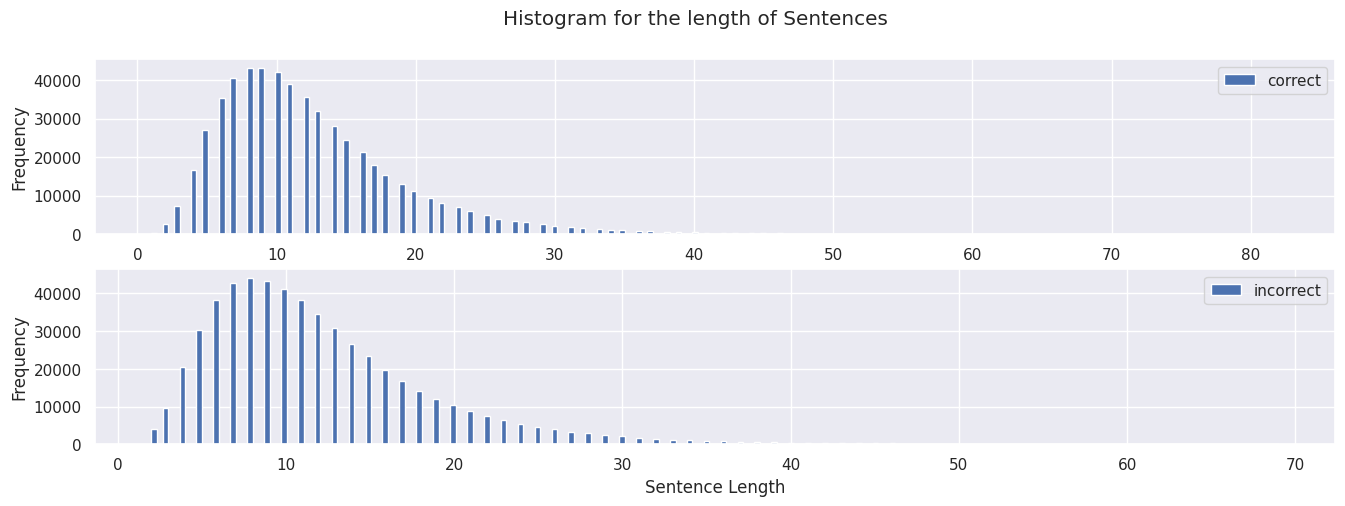

In [35]:
lengths_correct=melted_data['correct'].apply(lambda i:len(i.split(' ')))
lengths_incorrect=melted_data['incorrect'].apply(lambda i:len(i.split(' ')))
sns.set(rc={'figure.figsize':(16,5)})

fig,ax=plt.subplots(2,1)
plt.suptitle('Histogram for the length of Sentences')
lengths_correct.plot(kind='hist',bins=200,ax=ax[0])
plt.grid()
lengths_incorrect.plot(kind='hist',bins=200,ax=ax[1])

plt.xlabel('Sentence Length')
ax[0].legend()
ax[1].legend()

plt.show()

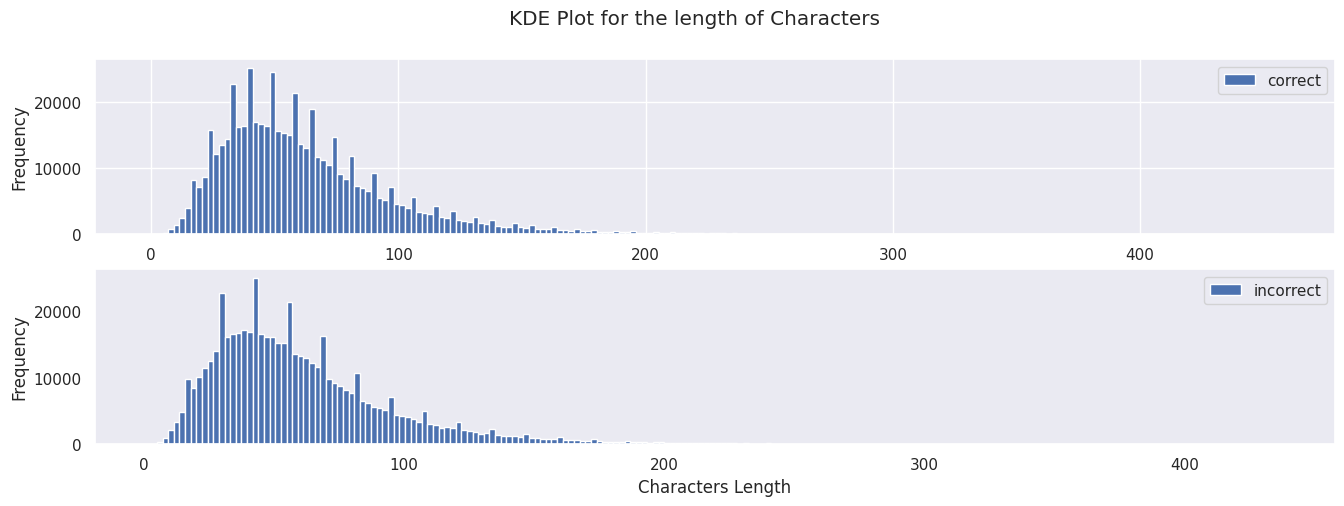

In [36]:
lengths_correct=melted_data['correct'].apply(lambda i:len(i))
lengths_incorrect=melted_data['incorrect'].apply(lambda i:len(i))

fig,ax=plt.subplots(2,1)
sns.set(rc={'figure.figsize':(16,5)})
plt.suptitle('KDE Plot for the length of Characters')
lengths_correct.plot(kind='hist',bins=200,ax=ax[0])
plt.grid()

lengths_incorrect.plot(kind='hist',bins=200,ax=ax[1])
plt.grid()

plt.xlabel('Characters Length')
ax[0].legend()
ax[1].legend()

plt.show()

### Observations:
- After removing the outliers, the max length of a sentence is 69 and most of the sentence are concentrated on 5-25 range.
- The character count is also proportionate.

In [37]:
#What are the unique number of words in correct and incorrect words
main_list=[]
for i in tqdm(melted_data['correct']):
    main_list.extend(i.split(' '))
print('The number of unique tokens in correct sentence is ',len(set(main_list)))

#What are the unique number of words in correct and incorrect words
main_list=[]
for i in tqdm(melted_data['incorrect']):
    main_list.extend(i.split(' '))
print('The number of unique tokens in incorrect sentence is ',len(set(main_list)))

100%|██████████████████████████████████████████████████████████████| 560918/560918 [00:00<00:00, 622936.54it/s]


The number of unique tokens in correct sentence is  78790


100%|██████████████████████████████████████████████████████████████| 560918/560918 [00:00<00:00, 640551.19it/s]


The number of unique tokens in incorrect sentence is  97846


### Observations:
- The number of tokens is more in incorrect sentence, because of the spelling sentences for the same word occuring multiple times, which is adding to more tokens.

In [38]:
from nltk.corpus import stopwords
import nltk

In [39]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')  
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/josephnadar1998/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/josephnadar1998/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/josephnadar1998/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/josephnadar1998/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/josephnadar1998/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [40]:
stop_words=stopwords.words('english')
stop_words_correct=[]
for i in tqdm(melted_data['correct']):
    words=i.split(' ')
    for w in words:
        if w in stop_words:
            stop_words_correct.append(w)

100%|███████████████████████████████████████████████████████████████| 560918/560918 [00:10<00:00, 53742.85it/s]


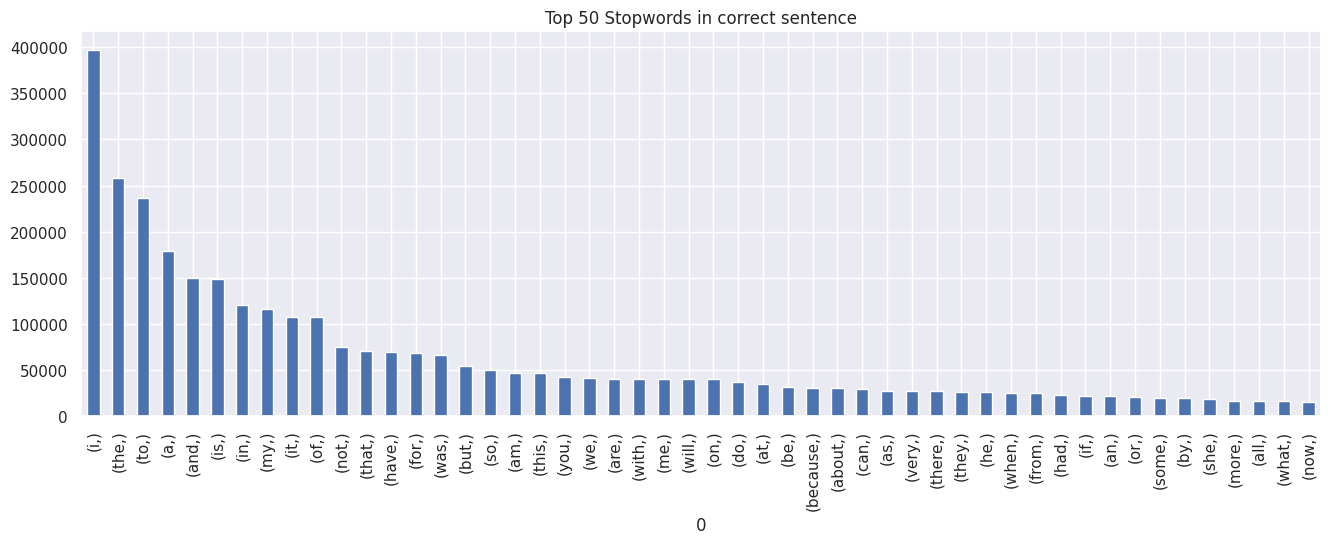

In [41]:
stop_words_correct=np.array(stop_words_correct)
data=pd.DataFrame(stop_words_correct)
plt.title('Top 50 Stopwords in correct sentence')
plt.xlabel('Stop Words')
data.value_counts().iloc[:50].plot(kind='bar')
plt.show()

In [42]:
stop_words=stopwords.words('english')
stop_words_incorrect=[]
for i in tqdm(melted_data['incorrect']):
    words=i.split(' ')
    for w in words:
        if w in stop_words:
            stop_words_incorrect.append(w)

100%|███████████████████████████████████████████████████████████████| 560918/560918 [00:10<00:00, 52491.28it/s]


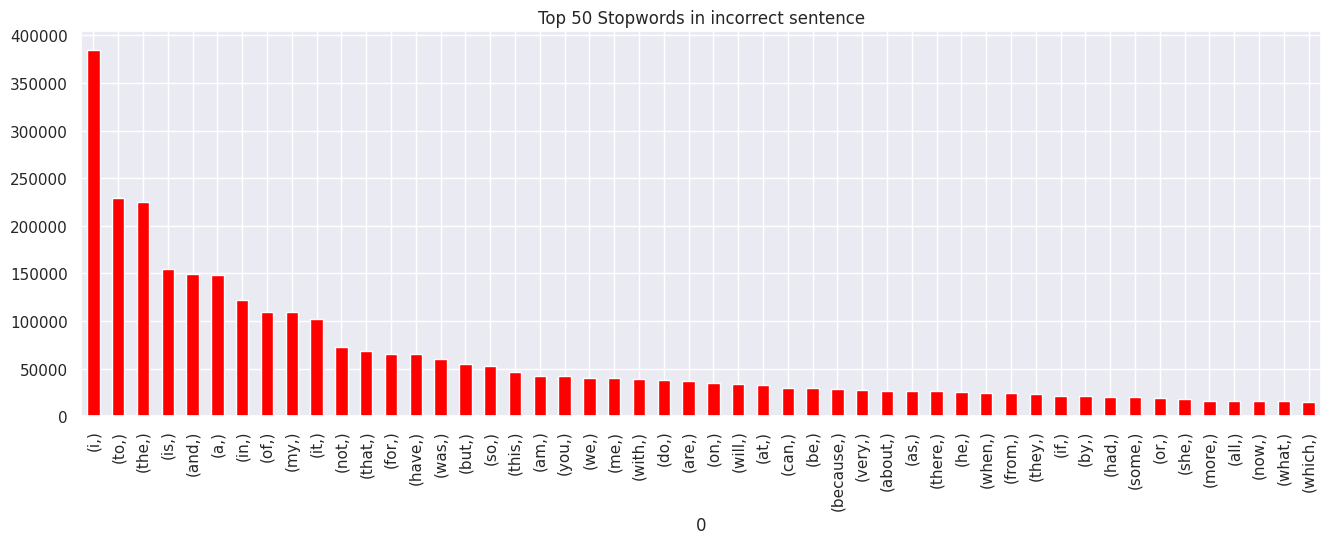

In [43]:
data=pd.DataFrame(stop_words_incorrect)
plt.title('Top 50 Stopwords in incorrect sentence')
plt.xlabel('Stop Words')
data.value_counts().iloc[:50].plot(kind='bar', color='red')
plt.show()

### Observation:
- There is not much difference in the list of top stopwords used for correct and incorrect sentence.

In [45]:
#Plotting the word cloud after removing the stop words
##ref: https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
from wordcloud import WordCloud, STOPWORDS
from nltk import PorterStemmer
from nltk import WordNetLemmatizer

stop_words=stopwords.words('english')

def generate_wordcloud(text):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for t in tqdm(text):
        words=[w for w in t.split(' ') if (w not in stop_words)]

        words=[lem.lemmatize(w) for w in words if len(w)>2]

        corpus.append(words)
    return corpus

def plot_wordcloud(corpus,title=None):
    wordcloud = WordCloud(background_color='white',stopwords=set(STOPWORDS),
                          max_words=100,max_font_size=30,scale=3,random_state=1)
    wordcloud=wordcloud.generate(str(corpus))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    if title:
        plt.title(title)
    plt.show()

100%|███████████████████████████████████████████████████████████████| 560918/560918 [00:27<00:00, 20093.50it/s]


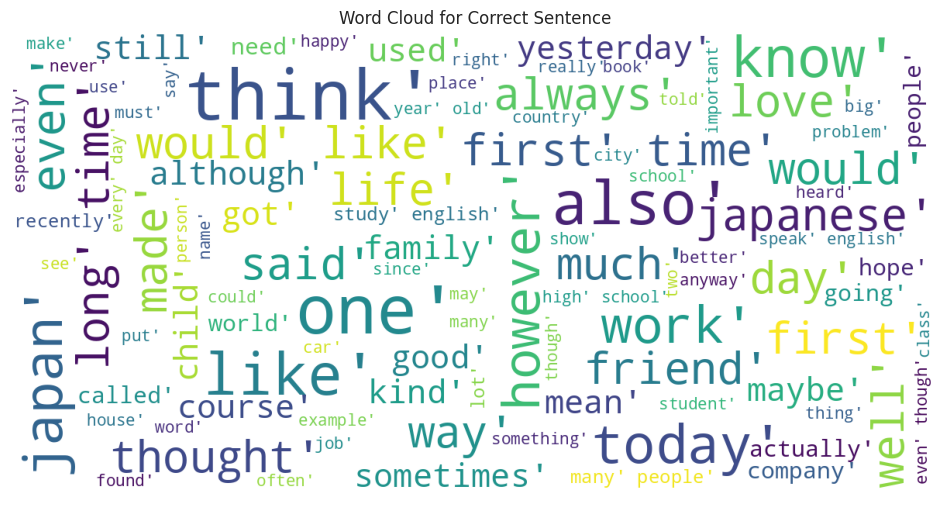

In [46]:
plot_wordcloud(generate_wordcloud(melted_data['correct']),'Word Cloud for Correct Sentence')

100%|███████████████████████████████████████████████████████████████| 560918/560918 [00:24<00:00, 23317.28it/s]


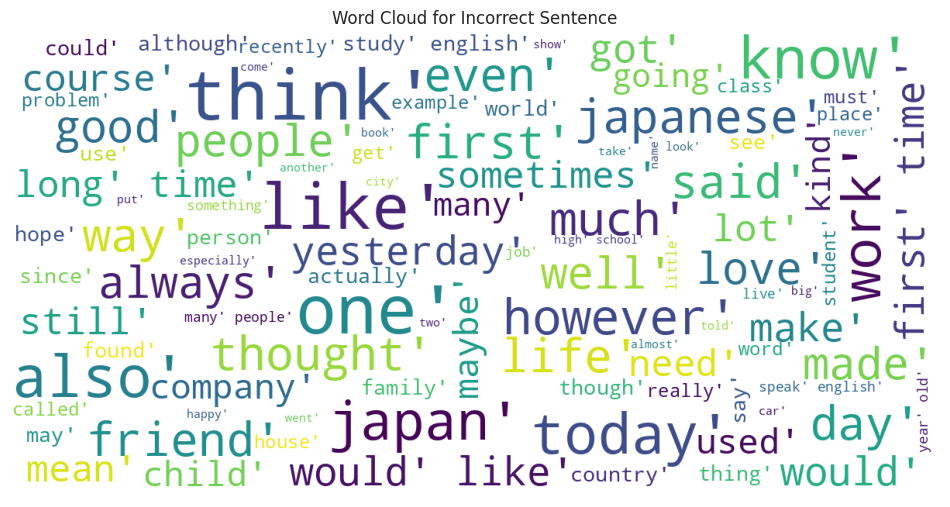

In [47]:
plot_wordcloud(generate_wordcloud(melted_data['incorrect']),'Word Cloud for Incorrect Sentence')

### Observations:
- The word cloud shows that stopwords are more in number. This may be because Lang dataset is taken from a question answer platform, and we tend to use more stopwords in conversations.

In [49]:
from textblob import TextBlob

TextBlob(melted_data['correct'].iloc[0]).sentiment.polarity

0.5

In [50]:
from textblob import TextBlob

def sentiment(i):
    s=TextBlob(i).sentiment.polarity
    if s<0:
        a='negative'
    elif s==0:
        a='neutral'
    else:
        a='positive'
    return a
    
melted_data['correct_sentiment']=melted_data['correct'].apply(sentiment)
melted_data['incorrect_sentiment']=melted_data['incorrect'].apply(sentiment)

In [51]:
from textblob import TextBlob

def subjective(i):
    s=TextBlob(i).sentiment.subjectivity
    if s<0.5:
        a='fact'
    else:
        a='opinion'
    return a
    
melted_data['correct_sent_type']=melted_data['correct'].apply(subjective)
melted_data['incorrect_sent_type']=melted_data['incorrect'].apply(subjective)

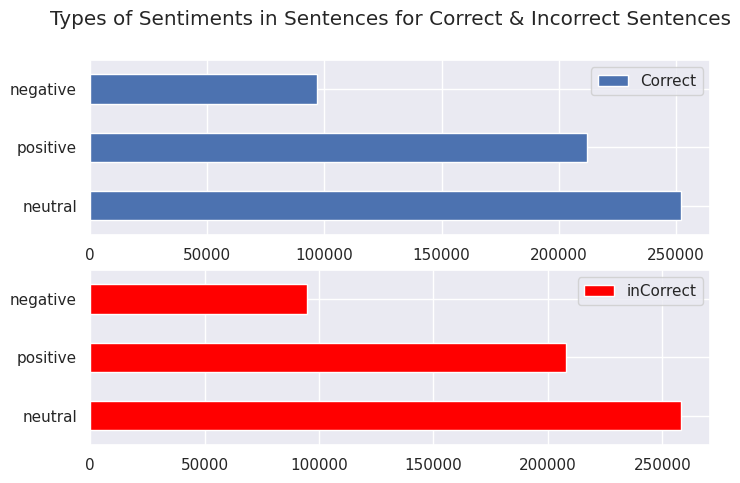

In [52]:
fig,ax=plt.subplots(2,1)
plt.suptitle('Types of Sentiments in Sentences for Correct & Incorrect Sentences')

melted_data['correct_sentiment'].value_counts().plot(kind='barh', figsize=(8,5), ax=ax[0], label='Correct')
melted_data['incorrect_sentiment'].value_counts().plot(kind='barh', figsize=(8,5), ax=ax[1], label='inCorrect', color='red')

ax[0].legend()
ax[1].legend()

plt.show()

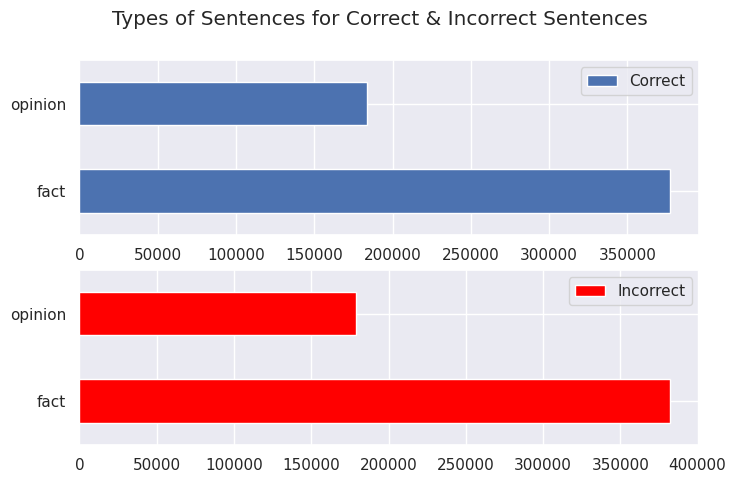

In [53]:
fig,ax=plt.subplots(2,1)
plt.suptitle('Types of Sentences for Correct & Incorrect Sentences')

melted_data['correct_sent_type'].value_counts().plot(kind='barh', figsize=(8,5), ax=ax[0], label='Correct')
melted_data['incorrect_sent_type'].value_counts().plot(kind='barh', figsize=(8,5), ax=ax[1], color='red', label='Incorrect')
ax[0].legend()
ax[1].legend()

plt.show()

In [54]:
def pie_chart(data,ax=plt, title=None):
    val_counts=data.value_counts()
    val_names=data.value_counts().index
    #plt.suptitle(title)
    pcts_Class_Disb = [f'{l.upper()}-{s} Points \n({s*100/sum(val_counts):.2f}%)' for s,l in zip(val_counts, val_names)] 
    plt.title(('Total Datapoints:',sum(val_counts.values)))
    ax.pie(val_counts, labels=pcts_Class_Disb,textprops = {"fontsize":10},startangle = 90)
    #plt.show()

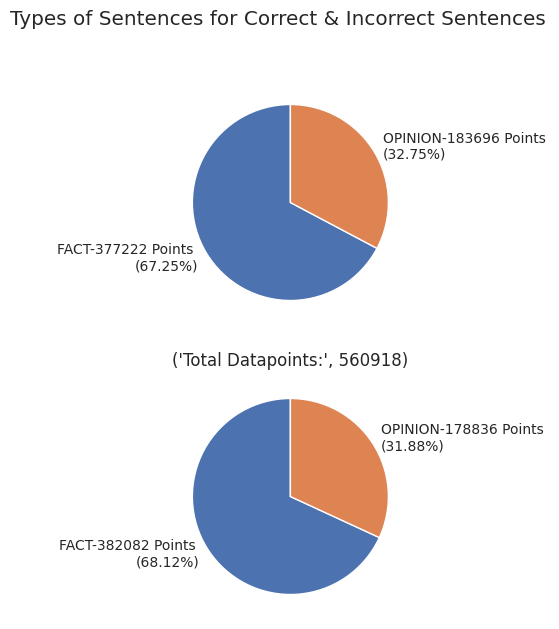

In [55]:
fig,ax=plt.subplots(2,1, figsize=(10,7))
plt.suptitle('Types of Sentences for Correct & Incorrect Sentences')

pie_chart(melted_data['correct_sent_type'],ax[0])
pie_chart(melted_data['incorrect_sent_type'],ax[1])
plt.show()

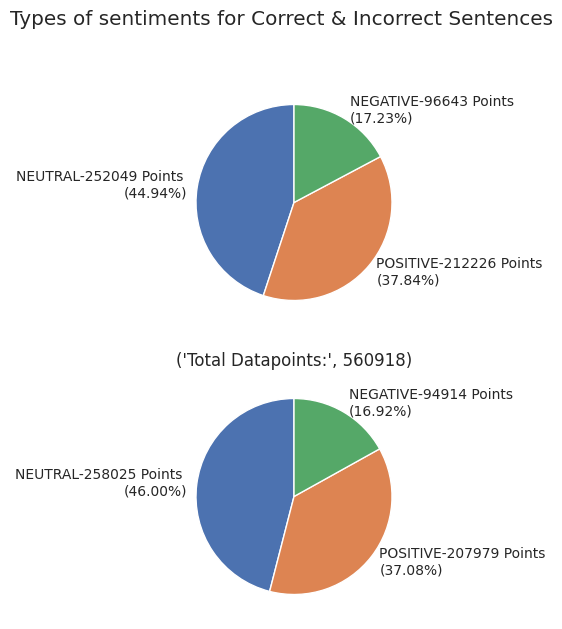

In [56]:
fig,ax=plt.subplots(2,1, figsize=(10,7))
plt.suptitle('Types of sentiments for Correct & Incorrect Sentences')

pie_chart(melted_data['correct_sentiment'],ax[0])
pie_chart(melted_data['incorrect_sentiment'],ax[1])
plt.show()

### Observations:
- Both the sentences have more or less the same types and numbers. We can use this datapoint to check in future for what type of sentences our model is failing and hence work backwords.

In [58]:
from textstat import flesch_reading_ease
tqdm.pandas()

melted_data['complexity score']=melted_data['correct'].progress_apply(flesch_reading_ease)

100%|███████████████████████████████████████████████████████████████| 560918/560918 [00:22<00:00, 25431.54it/s]


### Flesch Reading Ease:
- This number tells us the complexity of the sentence, the lower the value the more complex the model is.

![Image](https://contentwriters.com/blog/wp-content/uploads/2019/12/Flesch-Reading-Ease-Guide.png)

In [59]:
#Writing the above logic in a if else statement
def flesch_categorize(i):
    if i<=30:
        j='college_grad'
    elif i>30 and i<=50:
        j='college'
    elif i>50 and i<=60:
        j='10th-12th'
    elif i>60 and i<=70:
        j='8th-9th'
    elif i>70 and i<=80:
        j='7th'
    elif i>80 and i<=90:
        j='6th'
    elif i>90 :
        j='5th'
    
    return j
melted_data['complexity score']

0         87.72
1         85.69
2         71.82
3         95.51
4         94.15
          ...  
562327    83.66
562328    60.31
562329    47.79
562330    73.85
562331    63.02
Name: complexity score, Length: 560918, dtype: float64

In [60]:
melted_data['complexity score_cat']=melted_data['complexity score'].apply(flesch_categorize)

In [61]:
melted_data['complexity score_cat']

0             6th
1             6th
2             7th
3             5th
4             5th
           ...   
562327        6th
562328    8th-9th
562329    college
562330        7th
562331    8th-9th
Name: complexity score_cat, Length: 560918, dtype: object

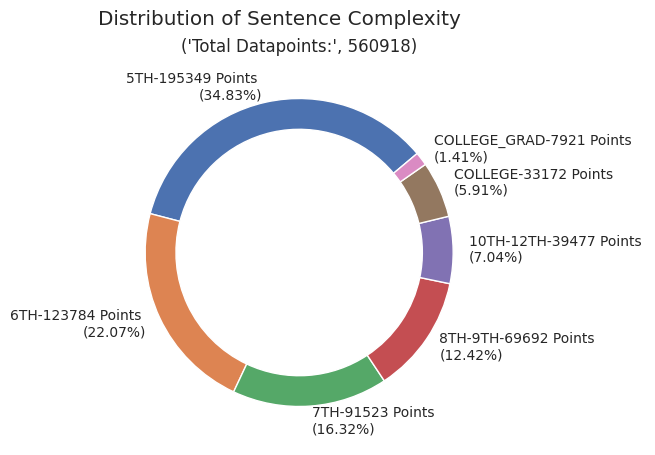

In [62]:
def pie_chart(data,ax=plt, title=None):
    val_counts=data.value_counts()
    val_names=data.value_counts().index
    #plt.suptitle(title)
    pcts_Class_Disb = [f'{l.upper()}-{s} Points \n({s*100/sum(val_counts):.2f}%)' for s,l in zip(val_counts, val_names)] 
    plt.title(('Total Datapoints:',sum(val_counts.values)))
    ax.pie(val_counts, labels=pcts_Class_Disb,textprops = {"fontsize":10},startangle = 40,wedgeprops=dict(width=0.2))
    #plt.show()

plt.suptitle('Distribution of Sentence Complexity')
pie_chart(melted_data['complexity score_cat'])

### Observations:
- Major share of the sentence belongs to 5th Standard type sentences, so most of the sentences are not complex.

### Creating a model & Preprocessing the data in the next Notebook